# <center><font color="#660000">TP1 Classification Non Supervisée</font></center>

<center><font size="4"><font color="#660000">Etude descriptive des données "Fromage"</font></font></center> 

## <font size=5><font color="#FF8C00">Partie I</font></font>

### <font color="#FF8C00">1. Input Data "Fromages_data.txt"</font>

In [10]:
nomfile = "fromages_data.txt"

In [11]:
fromages = read.table(nomfile, header=T,row.names=1,sep="\t",dec=".")

### <font size="4"><font color="#FF8C00">2. Manipulation des données</font></font>

<font size="4"><font color="#DB7093">Afficher les premiers 5 lignes</font></font>

In [13]:
fromages[1:5,]

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


<font size="4"><font color="#DB7093">Afficher les noms de chaque ligne</font></font>

In [14]:
rownames(fromages) 

[1] "CarredelEst"        "Babybel"            "Beaufort"          
 [4] "Bleu"               "Camembert"          "Cantal"            
 [7] "Chabichou"          "Chaource"           "Cheddar"           
[10] "Comte"              "Coulomniers"        "Edam"              
[13] "Emmental"           "Fr.chevrepatemolle" "Fr.fondu.45"       
[16] "Fr.frais20nat."     "Fr.frais40nat."     "Maroilles"         
[19] "Morbier"            "Parmesan"           "Petitsuisse40"     
[22] "PontlEveque"        "Pyrenees"           "Reblochon"         
[25] "Rocquefort"         "SaintPaulin"        "Tome"              
[28] "Vacherin"           "Yaourtlaitent.nat."

<font size="4"><font color="#DB7093">Afficher les noms de chaque colonne</font></font>

In [15]:
names(fromages)

[1] "calories"    "sodium"      "calcium"     "lipides"     "retinol"    
[6] "folates"     "proteines"   "cholesterol" "magnesium"

### <font size="4"><font color="#FF8C00">3. Analyse des statistiques descriptives</font></font>

In [16]:
#求出每一列的最小值，排列后第25%的值，中位数，平均值，排列后第75%的数，最大值

summary(fromages)

    calories       sodium         calcium         lipides         retinol      
 Min.   : 70   Min.   : 22.0   Min.   : 72.6   Min.   : 3.40   Min.   : 37.10  
 1st Qu.:292   1st Qu.:140.0   1st Qu.:132.9   1st Qu.:23.40   1st Qu.: 51.60  
 Median :321   Median :223.0   Median :202.3   Median :26.30   Median : 62.30  
 Mean   :300   Mean   :210.1   Mean   :185.7   Mean   :24.16   Mean   : 67.56  
 3rd Qu.:355   3rd Qu.:276.0   3rd Qu.:220.5   3rd Qu.:29.10   3rd Qu.: 76.40  
 Max.   :406   Max.   :432.0   Max.   :334.6   Max.   :33.30   Max.   :150.50  
    folates        proteines      cholesterol       magnesium    
 Min.   : 1.20   Min.   : 4.10   Min.   : 10.00   Min.   :10.00  
 1st Qu.: 4.90   1st Qu.:17.80   1st Qu.: 70.00   1st Qu.:20.00  
 Median : 6.40   Median :21.00   Median : 80.00   Median :26.00  
 Mean   :13.01   Mean   :20.17   Mean   : 74.59   Mean   :26.97  
 3rd Qu.:21.10   3rd Qu.:23.40   3rd Qu.: 90.00   3rd Qu.:30.00  
 Max.   :36.40   Max.   :35.70   Max.   :120

## <font size="5"><font color="#FF8C00">4. Construction d'une Statbase</font></font>

In [38]:
#建立一个statbase，按行（rbind）插入并存储每一列的summary()的结果

statbase = NULL
for (j in 1:ncol(fromages)){
  statbase =rbind(statbase, summary(fromages[,j]))
}

#statbase的每一行的命名对应fromage的names(),每一列的名字

rownames(statbase) = names(fromages)

#求fromages中每一列的标准差

ecart.type = apply(fromages, 2, sd)

#讲标准差按列cbind插入statbase

statbase = cbind(statbase, round(ecart.type,2))

In [39]:
statbase

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,
calories,70.0,292.0,321.0,300.03448,355.0,406.0,91.91
sodium,22.0,140.0,223.0,210.08621,276.0,432.0,108.68
calcium,72.6,132.9,202.3,185.73448,220.5,334.6,72.53
lipides,3.4,23.4,26.3,24.15862,29.1,33.3,8.13
retinol,37.1,51.6,62.3,67.56207,76.4,150.5,24.16
folates,1.2,4.9,6.4,13.01034,21.1,36.4,11.72
proteines,4.1,17.8,21.0,20.16897,23.4,35.7,6.96
cholesterol,10.0,70.0,80.0,74.58621,90.0,120.0,28.25
magnesium,10.0,20.0,26.0,26.96552,30.0,51.0,11.32


### <font size="4"><font color="#FF8C00">5. Histogramme en frequences de la premiere variable</font></font>

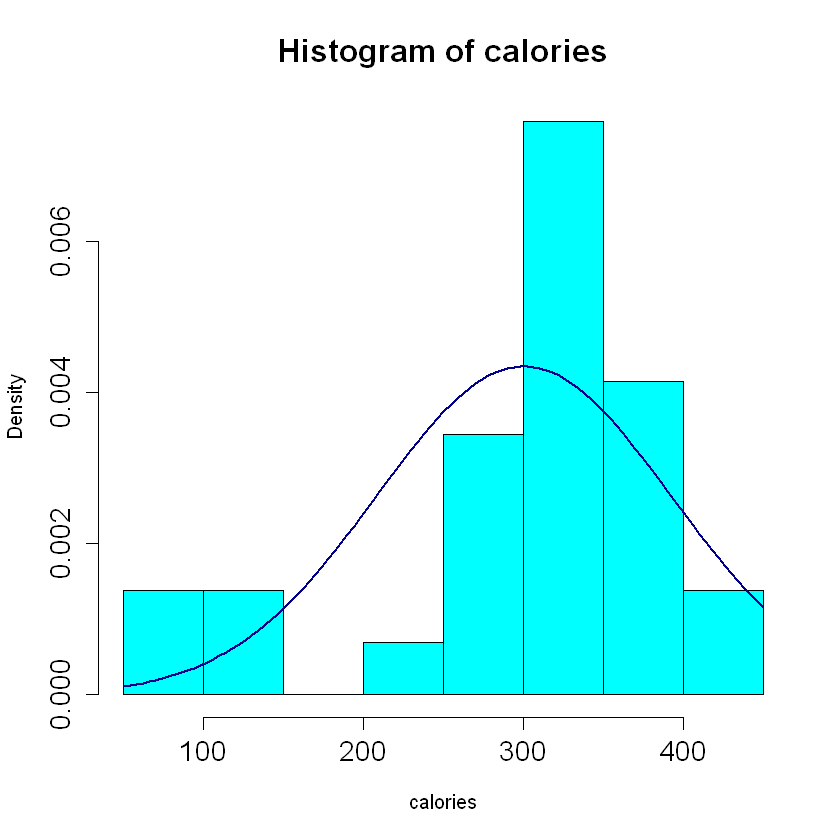

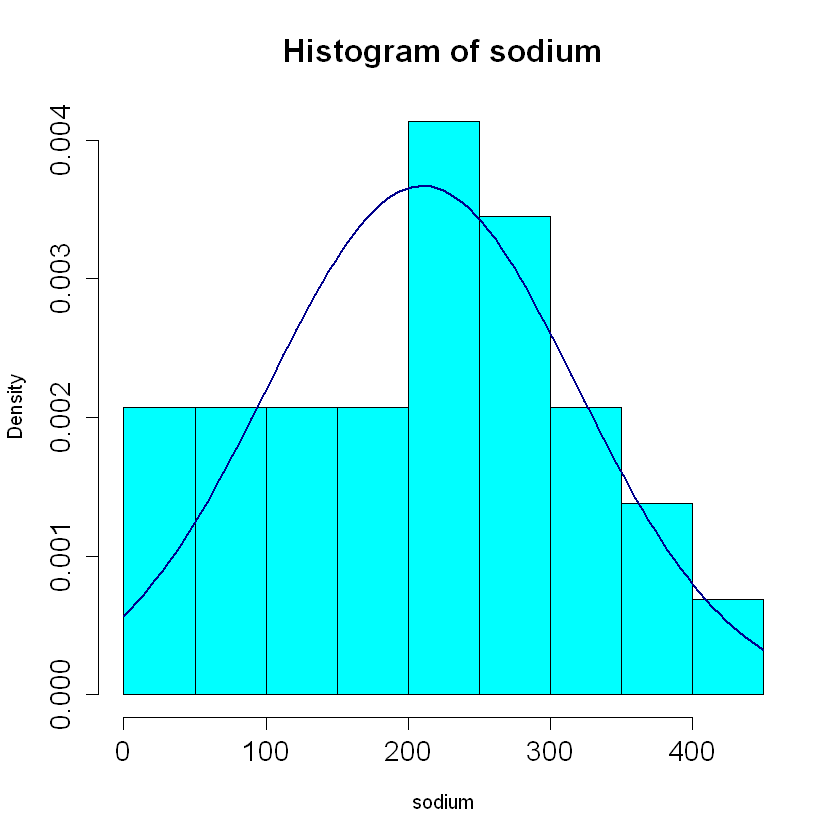

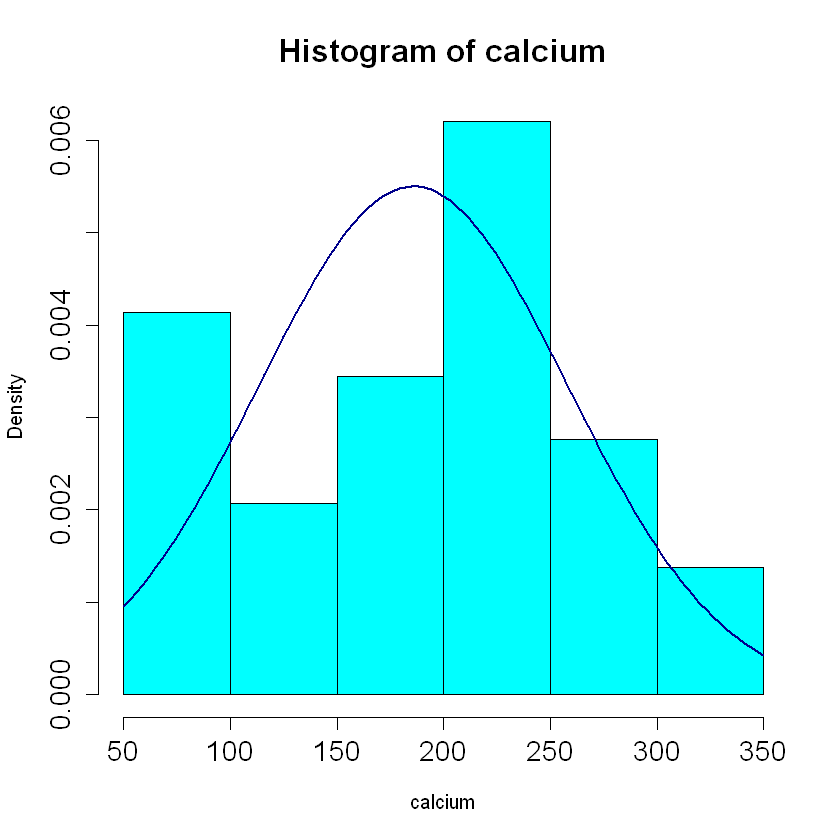

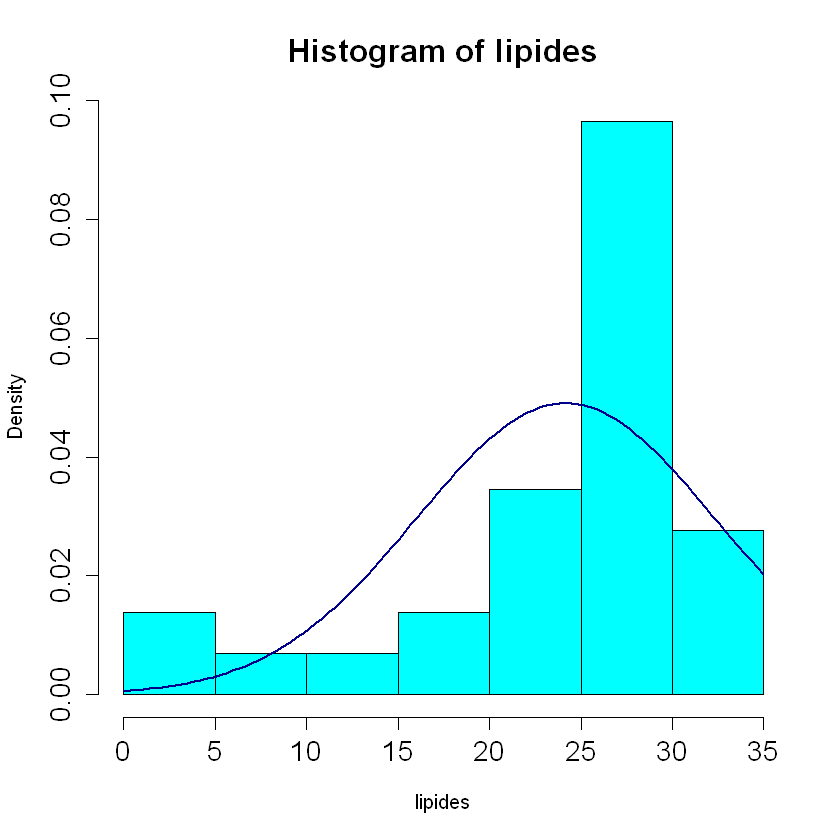

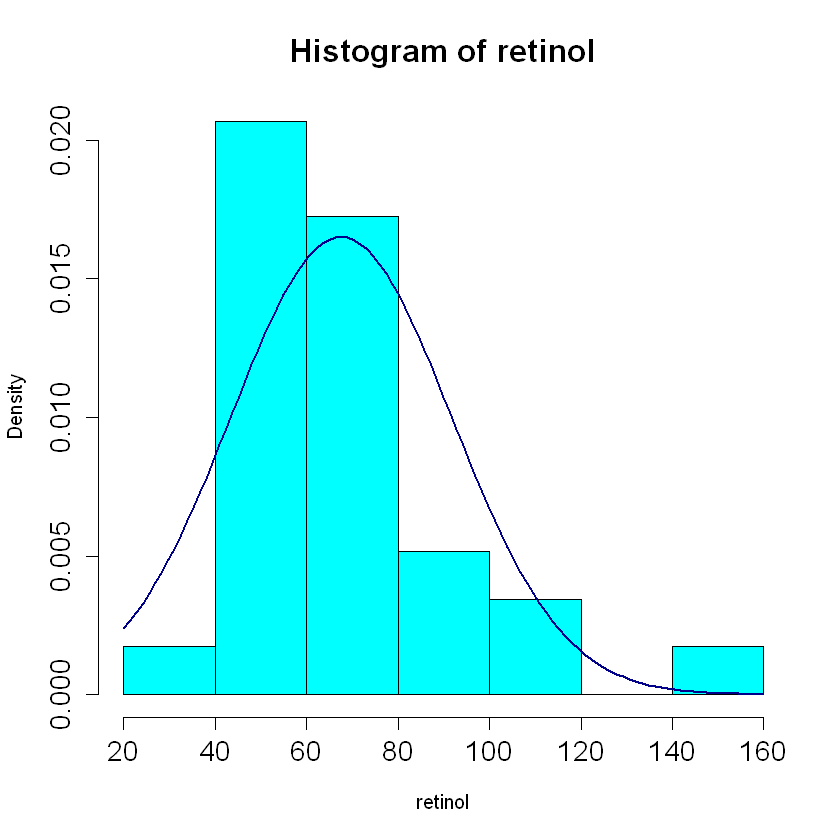

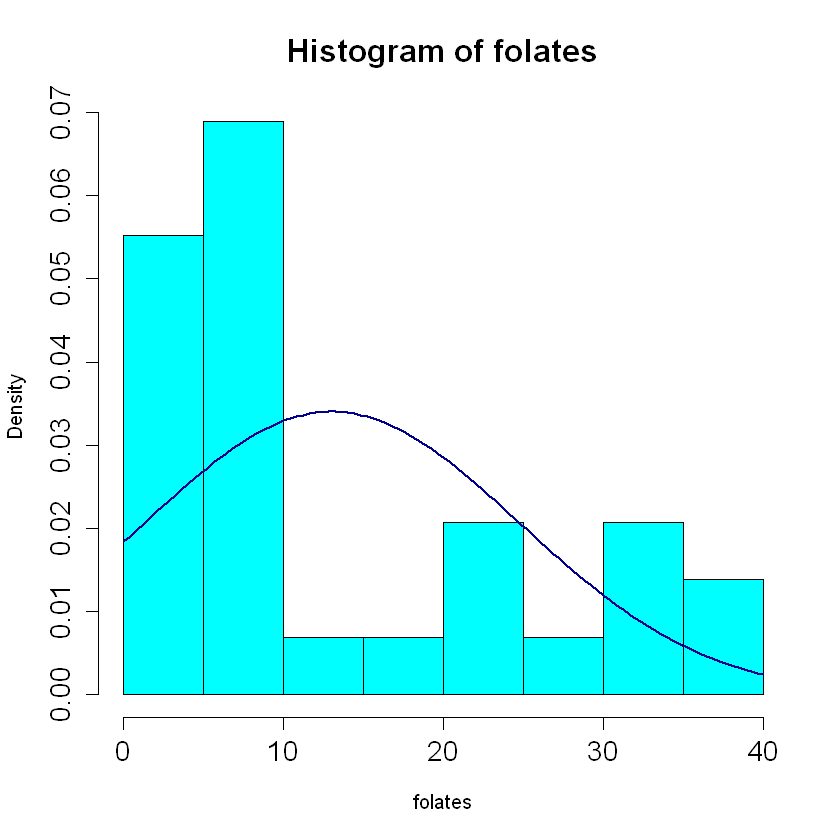

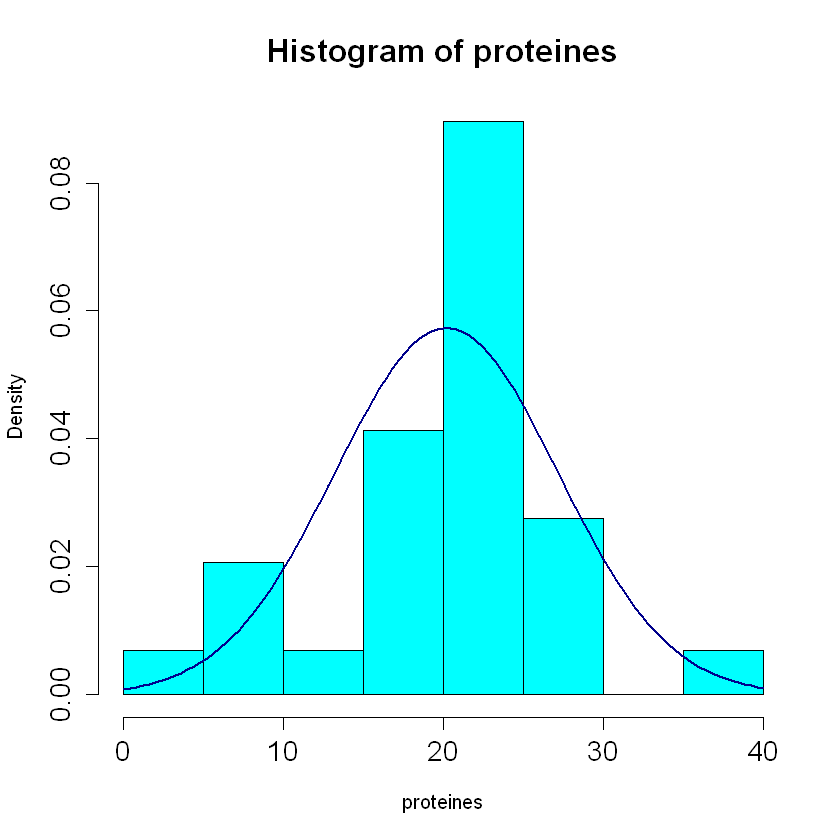

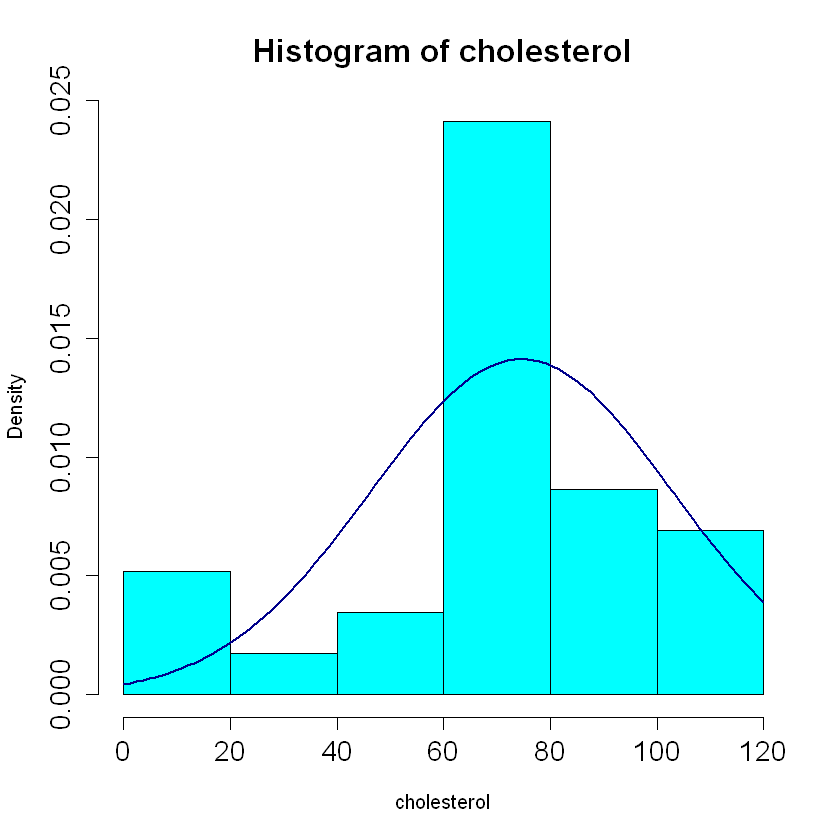

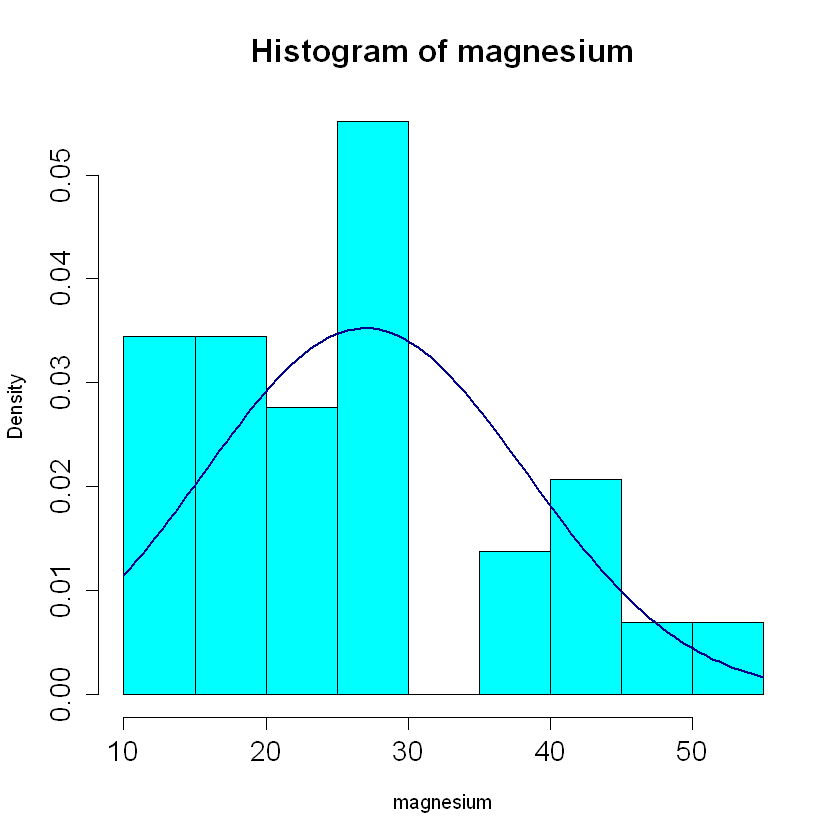

In [55]:
# 直方图，质量分布图
# x轴：组距相同的范围分组，y轴：频数（出现次数）/频率（归一化，和为1）
# proba 为True频率 False为频数    col 设置条的颜色    xlab 设置x轴名字    xlim 设置x轴范围    cex 指定符号的大小    main 图标的标题

j = 1
for (j in 1:9){
    # 绘制直方图
    hist(as.numeric(fromages[,j]), main = paste("Histogram of",names(fromages)[j]), proba=TRUE, col = "cyan", xlab=names(fromages)[j],
     cex.main=1.6, cex.axis=1.4)
    # 加入正态分布密度曲线
    curve(dnorm(x,mean=mean(fromages[,j]),sd=sd(fromages[,j])),add=TRUE,col='darkblue',lwd=2)
}

<font size=4>从上述9张图中可得，sodium，calsium更偏向于是一个正态分布(loi normale).</font>

### <font size="4"><font color="#FF8C00">6. Corrélation entre chaque 2 caractéristiques.</font></font>

In [56]:
#计算列于列间的相关度，保留两位小数

round(cor(fromages), 2)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.00,0.45,0.43,0.98,-0.04,-0.32,0.89,0.96,0.75
sodium,0.45,1.00,0.01,0.48,0.14,0.14,0.28,0.33,0.03
calcium,0.43,0.01,1.00,0.34,-0.29,-0.64,0.61,0.43,0.71
lipides,0.98,0.48,0.34,1.00,-0.02,-0.28,0.81,0.96,0.69
retinol,-0.04,0.14,-0.29,-0.02,1.00,0.52,-0.04,-0.09,-0.10
folates,-0.32,0.14,-0.64,-0.28,0.52,1.00,-0.35,-0.37,-0.45
proteines,0.89,0.28,0.61,0.81,-0.04,-0.35,1.00,0.82,0.79
cholesterol,0.96,0.33,0.43,0.96,-0.09,-0.37,0.82,1.00,0.75
magnesium,0.75,0.03,0.71,0.69,-0.10,-0.45,0.79,0.75,1.00


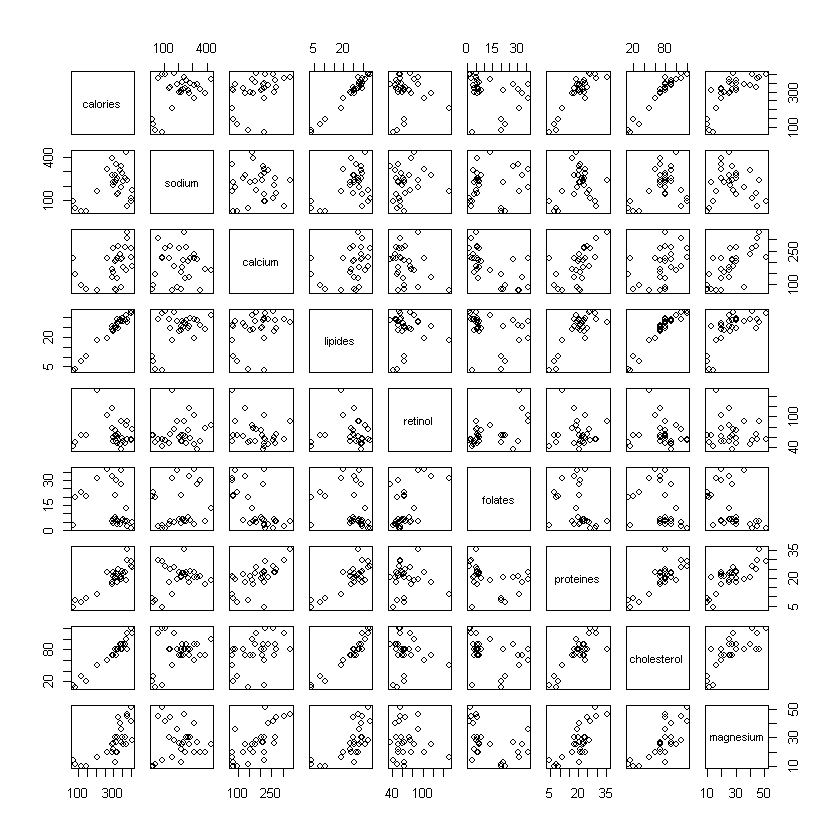

In [57]:
#把数据集中每个特征，两两绘制散点图，删去呈线性关系的变量，即相关度高的变量
pairs(fromages)

<font size=4>从上述图和相关性矩阵中可得，calories，lipides，cholesterol和proteines之间的相关度更高，应当保留，其他的删去。</font>

### <font size="4"><font color="#FF8C00">7. Etudier la modélisation linéaire de cette variable “calories”.</font></font>

In [58]:
#利用lm函数做最小二乘算法的一元线性回归 ： yi = β0 + β1xi +εi
#使用lm函数做多元线性回归，lm(y ~ u + v+ w)

# "."代表fromages中每一列变量(en fonction des 8 autres variables)
reslm = lm(calories ~ .,data = fromages)
summary(reslm)


Call:
lm(formula = calories ~ ., data = fromages)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9261  -5.8959  -0.3326   3.8848  17.9170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.21563   10.42523   2.611   0.0167 *  
sodium       0.03141    0.02470   1.272   0.2180    
calcium     -0.01740    0.05054  -0.344   0.7343    
lipides      6.78355    1.02424   6.623 1.89e-06 ***
retinol     -0.04326    0.08679  -0.499   0.6236    
folates     -0.06413    0.23255  -0.276   0.7855    
proteines    3.27585    0.56701   5.777 1.18e-05 ***
cholesterol  0.52666    0.25741   2.046   0.0541 .  
magnesium    0.14740    0.35829   0.411   0.6852    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.244 on 20 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9899 
F-statistic: 343.6 on 8 and 20 DF,  p-value: < 2.2e-16


<font size=4>从上述结果中可得，calories与lipides和proteines之间的effet是significatif的。与Part 6中得出的结果基本吻合。</font>

### <font size="4"><font color="#FF8C00">8. Sélection de variables pas à pas descendante.</font></font>

In [59]:
# 只比较significatif之间的特征参数：calories， lipides 和 proteines。

reslm1 = lm(fromages[,1] ~ fromages[,4] + fromages[,7])
summary(reslm1)


Call:
lm(formula = fromages[, 1] ~ fromages[, 4] + fromages[, 7])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2519  -6.0735  -0.7976   6.5884  16.6638 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    19.6369     5.6466   3.478   0.0018 ** 
fromages[, 4]   8.7525     0.3649  23.986  < 2e-16 ***
fromages[, 7]   3.4186     0.4262   8.020 1.69e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.221 on 26 degrees of freedom
Multiple R-squared:  0.9907,	Adjusted R-squared:  0.9899 
F-statistic:  1378 on 2 and 26 DF,  p-value: < 2.2e-16


<font size=4>从上述结果中可得，calories与lipides和proteines之间的effet是significatif的，且这三个特征参数已经包含了98.99%的信息。
并且lipides的显著性(t-value)更高。</font>

In [61]:
reslm1 = lm(fromages[,1] ~ fromages[,4])
summary(reslm1)


Call:
lm(formula = fromages[, 1] ~ fromages[, 4])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.212  -9.849   0.823   9.711  43.806 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     31.366      9.976   3.144  0.00402 ** 
fromages[, 4]   11.121      0.392  28.367  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.86 on 27 degrees of freedom
Multiple R-squared:  0.9675,	Adjusted R-squared:  0.9663 
F-statistic: 804.7 on 1 and 27 DF,  p-value: < 2.2e-16


<font size=4>从上述结果中可得，calories与lipides之间的effet是significatif的，且这两个特征参数已经包含了96.63%的信息。
模型中只需要 calorie和lipides作为特征参数即可代替其他的特征参数。</font>

## <font size=5><font color="#FF8C00">Partie II - Analyse en composantes principales</font></font>

<font size=4><font color="#5F9EA0">主成分分析</font></font>

PCA的目标是用一组较少的不相关变量代替大量相关变量，同时尽可能保留初始变量的信息，这些推导所得的变量称为主成分，它们是观测变量的线性组合。


如第一主成分为：PC1=a1X1+a2X 2+……+ak Xk它是k个观测变量的加权组合，对初始变量集的方差解释性最大。


第二主成分也是初始变量的线性组合，对方差的解释性排第二，同时与第一主成分正交（不相关）。


后面每一个主成分都最大化它对方差的解释程度，同时与之前所有的主成分都正交。

### <font size="4"><font color="#FF8C00">1. ACP normée.</font></font>

In [10]:
# cor=True 代表使用样本的correlation矩阵做分析 否则使用协方差阵
# acp的结果中包含：sdev标准差 loadings特征向量矩阵 centre平均值 scores 代表与主成分相关性得分
acp = princomp(fromages,cor=T,scores=T)
str(acp)

List of 7
 $ sdev    : Named num [1:9] 2.247 1.358 0.932 0.76 0.596 ...
  ..- attr(*, "names")= chr [1:9] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: 'loadings' num [1:9, 1:9] 0.4247 0.1507 0.2941 0.4071 -0.0735 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "calories" "sodium" "calcium" "lipides" ...
  .. ..$ : chr [1:9] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ center  : Named num [1:9] 300 210.1 185.7 24.2 67.6 ...
  ..- attr(*, "names")= chr [1:9] "calories" "sodium" "calcium" "lipides" ...
 $ scale   : Named num [1:9] 90.32 106.79 71.27 7.99 23.74 ...
  ..- attr(*, "names")= chr [1:9] "calories" "sodium" "calcium" "lipides" ...
 $ n.obs   : int 29
 $ scores  : num [1:29, 1:9] -0.642 0.472 2.929 0.763 -0.974 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:29] "CarredelEst" "Babybel" "Beaufort" "Bleu" ...
  .. ..$ : chr [1:9] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ call    : language princomp(x = fromages, cor = T, scores = T)
 - attr(*, "class")

In [11]:
# 标准误、方差贡献率和累积贡献率: Standard deviation, Proportion of Variance, Cumulative Proportion
summary(acp,loadings=TRUE)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.2470233 1.3580937 0.93155833 0.75985832 0.59599510
Proportion of Variance 0.5610126 0.2049354 0.09642232 0.06415385 0.03946779
Cumulative Proportion  0.5610126 0.7659480 0.86237034 0.92652420 0.96599199
                           Comp.6     Comp.7      Comp.8       Comp.9
Standard deviation     0.41870227 0.31214454 0.168615311 0.0699653175
Proportion of Variance 0.01947907 0.01082602 0.003159014 0.0005439051
Cumulative Proportion  0.98547106 0.99629708 0.999456095 1.0000000000

Loadings:
            Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
calories     0.425  0.183         0.168                       0.278  0.814
sodium       0.151  0.459  0.576 -0.589        -0.156 -0.199 -0.153       
calcium      0.294 -0.378 -0.197 -0.616 -0.233         0.530  0.130       
lipides      0.407  0.231  0.120  0.231  0.119         0.156  0.614 -0.536
reti

<font size=4>从上述结果中可得，选取3个特征参数可包含86.2%的信息。</font>

### <font size="4"><font color="#FF8C00">2. Screeplot.</font></font>

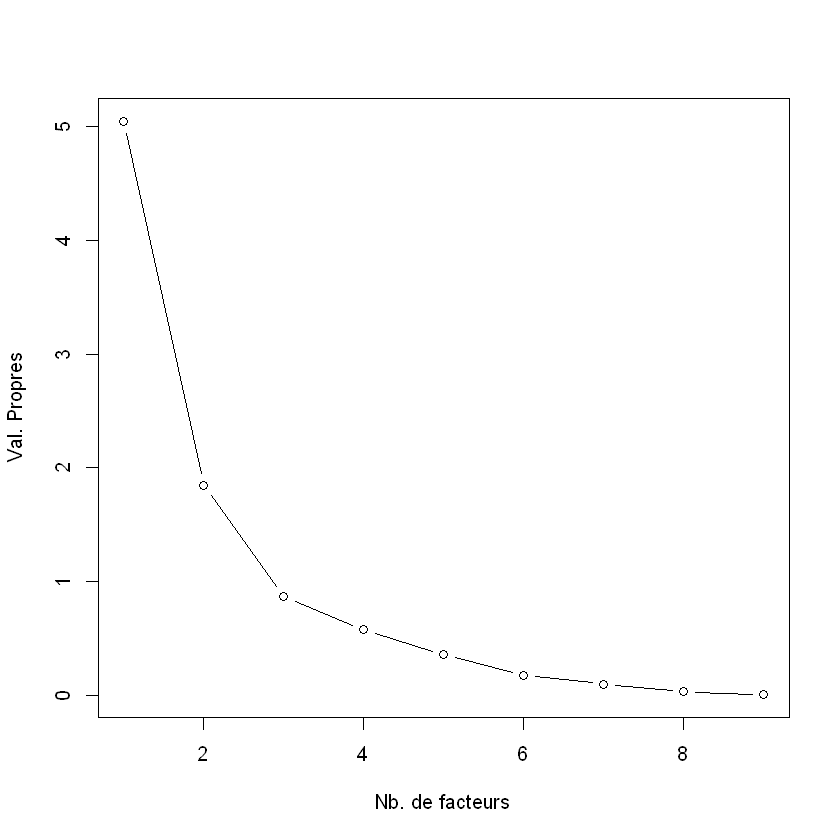

In [12]:
# screeplot - 2 axes retenus 主成分的碎石图，原则：取特征值>1 且 大于平行分析

# A$x 代表数据A中的变量x; lm.x代表一个变量；lm$x代表lm的一个属性
# acp$sdev^2 代表取出acp中的sdev变量并做平方（得方差，也就是特征值）
plot(1:9,acp$sdev^2,type="b",xlab="Nb. de facteurs",ylab="Val. Propres")

<font size=4>从上述结果中可得，大于1的部分只有两个特征参数，因此取前两个主成分做分析即可。</font>

### <font size="4"><font color="#FF8C00">3. Biplot.</font></font>

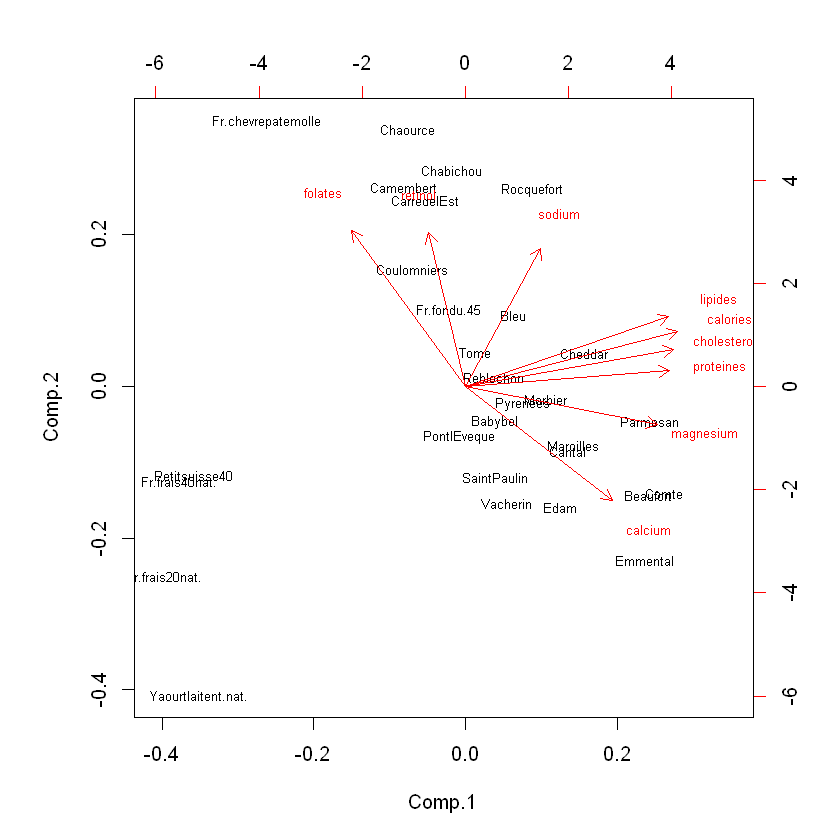

In [13]:
#biplot 画出数据关于主成分的散点图 原坐标在主成分下的方向
#两变量夹角180° forte correlation negative；0° forte correlation positive；90° non correlation
biplot(acp,cex=0.65)

<font size=4>把上图按照4个象限进行分类。可以把fromages分为四类。</font>

### <font size="4"><font color="#FF8C00">4. 额外的部分，或许不重要</font></font>

In [14]:
# 主因子分析，计算特征参数的相关系数矩阵
fromages.cor<-cor(fromages)
fromages.cor

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.00000000,0.447224073,0.433400087,0.98363377,-0.04288511,-0.3210979,0.88537159,0.96192339,0.74544320
sodium,0.44722407,1.000000000,0.005958892,0.48334434,0.14432755,0.1365614,0.27599791,0.33299397,0.03111281
calcium,0.43340009,0.005958892,1.000000000,0.34113187,-0.28954677,-0.6375025,0.61070486,0.42844622,0.71048042
lipides,0.98363377,0.483344342,0.341131874,1.00000000,-0.01835291,-0.2765428,0.80930257,0.95544387,0.68986008
retinol,-0.04288511,0.144327552,-0.289546767,-0.01835291,1.00000000,0.5172664,-0.03917254,-0.08697243,-0.09980065
folates,-0.32109786,0.136561416,-0.637502539,-0.27654282,0.51726643,1.0000000,-0.35287125,-0.36634610,-0.44706739
proteines,0.88537159,0.275997906,0.610704864,0.80930257,-0.03917254,-0.3528712,1.00000000,0.81713835,0.78777726
cholesterol,0.96192339,0.332993972,0.428446215,0.95544387,-0.08697243,-0.3663461,0.81713835,1.00000000,0.75245338
magnesium,0.74544320,0.031112805,0.710480424,0.68986008,-0.09980065,-0.4470674,0.78777726,0.75245338,1.00000000


In [15]:
# 计算特征值和特征向量及因子的贡献率和累积贡献率
fromages.eigen<-eigen(fromages.cor)
fromages.eigen

eigen() decomposition
$values
[1] 5.049113814 1.844418362 0.867800921 0.577384673 0.355210155 0.175311592
[7] 0.097434214 0.028431123 0.004895146

$vectors
            [,1]        [,2]       [,3]         [,4]        [,5]         [,6]
 [1,] -0.4247135  0.18269387 -0.0640164 -0.168328977  0.03708393 -0.092338461
 [2,] -0.1506519  0.45864411 -0.5763520  0.588958382 -0.01704331  0.155503845
 [3,] -0.2940906 -0.37781590  0.1967491  0.616165791 -0.23345010  0.006730827
 [4,] -0.4070819  0.23137901 -0.1202901 -0.230814562  0.11926078  0.097349339
 [5,]  0.0734541  0.50956831  0.6479515  0.285603270  0.48106096 -0.005299608
 [6,]  0.2277333  0.51647500  0.1724301 -0.124034770 -0.76115430  0.048618148
 [7,] -0.4081599  0.05349076  0.1644870  0.042541472 -0.21540158 -0.755946052
 [8,] -0.4163806  0.12323642 -0.0360387 -0.305064591  0.11900158  0.150220746
 [9,] -0.3840473 -0.12463012  0.3641597 -0.005450031 -0.24140730  0.601130143
             [,7]         [,8]         [,9]
 [1,] -0.05839055  0

In [16]:
# 用特征值的平方根乘以相应的特征向量得到因子载荷矩阵.并且只显示前2个因子的结果
t(sqrt(fromages.eigen$values) *t(fromages.eigen$vectors))[,1:2]

-0.9543410,0.24811539
-0.3385182,0.62288165
-0.6608283,-0.51310938
-0.9147226,0.31423437
0.1650531,0.69204148
0.5117220,0.70142142
-0.9171448,0.07264546
-0.9356169,0.16736661
-0.8629632,-0.16925937


In [17]:
fromages.fa<-factanal(fromages,factors = 2)
print(fromages.fa, cutoff=0.001)


Call:
factanal(x = fromages, factors = 2)

Uniquenesses:
   calories      sodium     calcium     lipides     retinol     folates 
      0.005       0.670       0.187       0.014       0.901       0.598 
  proteines cholesterol   magnesium 
      0.142       0.068       0.219 

Loadings:
            Factor1 Factor2
calories     0.962   0.264 
sodium       0.523  -0.237 
calcium      0.212   0.876 
lipides      0.982   0.148 
retinol      0.038  -0.312 
folates     -0.172  -0.610 
proteines    0.768   0.518 
cholesterol  0.927   0.271 
magnesium    0.600   0.649 

               Factor1 Factor2
SS loadings      4.047   2.148
Proportion Var   0.450   0.239
Cumulative Var   0.450   0.688

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 39.2 on 19 degrees of freedom.
The p-value is 0.00416 


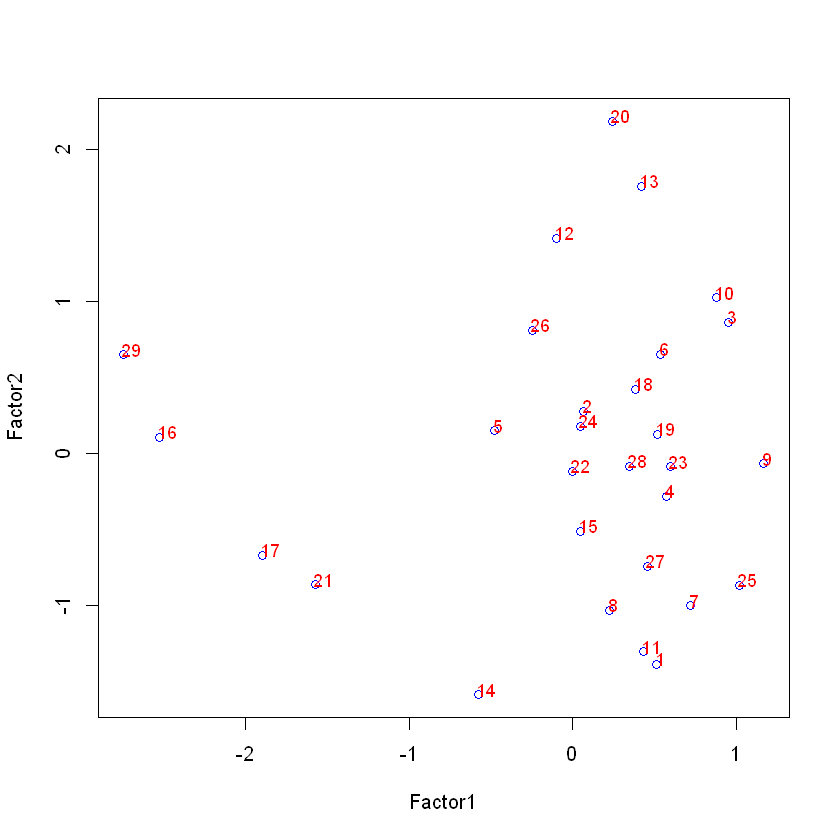

In [7]:
# 用回归方法(regression)计算因子得分并作图，然后对样本进行分类
fromagesfa<-factanal(fromages,factors = 2, scores = "regression")
#fromagesfa$scores
plot(fromagesfa$scores[,1:2],col='blue')
text(fromagesfa$scores[,1],fromagesfa$scores[,2],col = 'red',cex = 0.9,adj = c(0.1,0.1))
#text(fromagesfa$scores[,1],fromagesfa$scores[,3],col = 'green',cex = 0.9,adj = c(0.1,0.1,0.1))

## <font size=5><font color="#FF8C00">Partie III - Classification ascendante hiérarchique</font></font>

CarredelEst            Babybel           Beaufort               Bleu 
                 1                  2                  3                  1 
         Camembert             Cantal          Chabichou           Chaource 
                 2                  1                  2                  2 
           Cheddar              Comte        Coulomniers               Edam 
                 3                  3                  2                  3 
          Emmental Fr.chevrepatemolle        Fr.fondu.45     Fr.frais20nat. 
                 3                  2                  1                  4 
    Fr.frais40nat.          Maroilles            Morbier           Parmesan 
                 4                  1                  1                  1 
     Petitsuisse40        PontlEveque           Pyrenees          Reblochon 
                 4                  2                  2                  2 
        Rocquefort        SaintPaulin               Tome           Vacherin 
                 1                  3                  2                  3 
Yaourtlaitent.nat. 
                 4

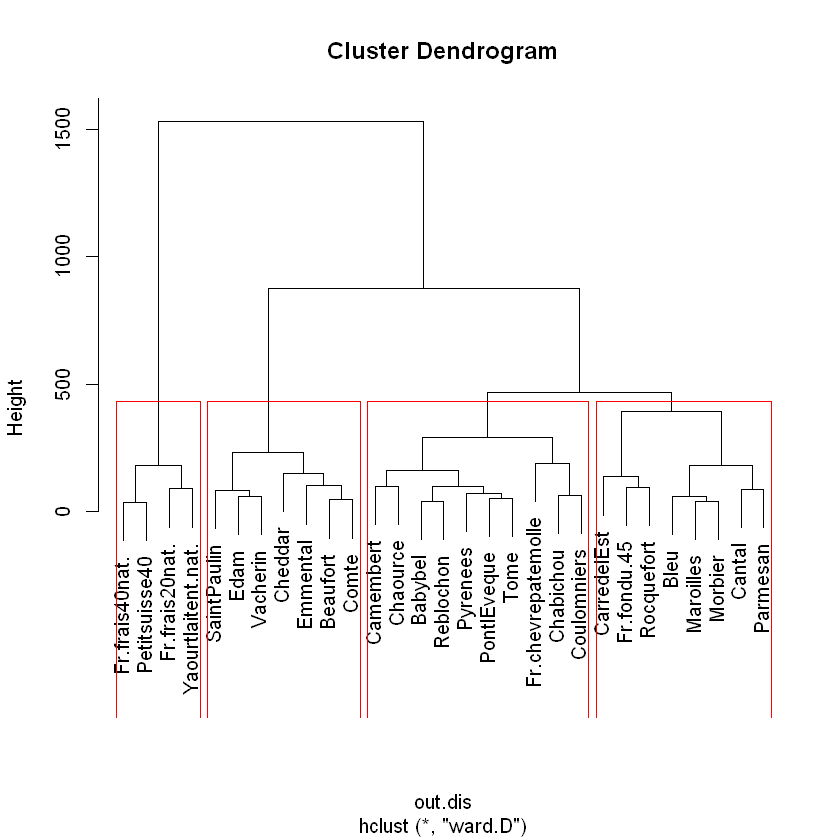

In [5]:
out.dis=dist(fromages,method="euclidean") #使用欧几里得距离
out.hclust=hclust(out.dis, method = "ward.D") #使用ward法
plot(out.hclust) # 画出树状图

rect.hclust(out.hclust, k=4) # 想要分成4类
out.id = cutree(out.hclust, k=4) #返回每一类所包含的fromage
out.id